In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math

In [27]:
import matplotlib.font_manager as font_manager
from os.path import expanduser
import matplotlib as mpl
fontpath = expanduser("/Users/aneeshr/Library/Fonts/LinLibertine_aS.ttf")
prop = font_manager.FontProperties(fname=fontpath)
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['text.usetex'] = True
mpl.rcParams.update({'font.size': 12})

In [28]:
B=250
fg=0.008
fp=0.008
Zr=1

In [29]:
def p(d,Nb):
    return 2*(d*math.log(Nb,B)-1)/(fg*Zr*fp*Nb-2*math.log(Nb,B))

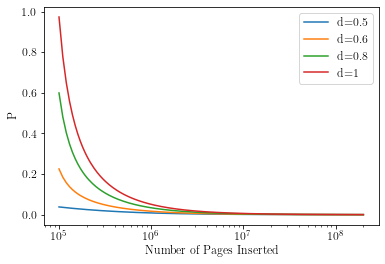

In [30]:
deltas=[0.5,0.6,0.8,1]
plt.ticklabel_format(style='sci', axis='x')
plt.xlabel("Number of Pages Inserted")
plt.ylabel("P")

for d in deltas:
    arr=[]
    i_s=[]
    for i in range(100000, 200000000, 10000):
#         print(i,":",p(d,i))
        i_s.append(i)
        arr.append(p(d,i))
    plt.xscale("log")
    plt.plot(i_s,arr, label="d="+str(d))
    plt.legend()

plt.show()

In [31]:
def L(Nb):
    return math.log(Nb,B)

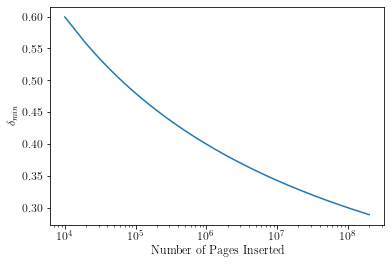

In [38]:
i_s=[]
ds=[]
for i in range(10000, 200000000, 10000): 
    l_i = L(i)
    i_s.append(i)
    ds.append(1/l_i)
plt.xscale("log")
plt.plot(i_s, ds)
plt.xlabel("Number of Pages Inserted")
plt.ylabel("$\delta_{min}$")
plt.show()

In [33]:
def ins_cost(beta, p, Nb):
    return (1-beta)*math.log(Nb,B)+beta*(math.log(p*Nb,2)+1)/B

In [34]:
def read_cost(p,Nb):
    return p*(fg*fp*Nb/2 -math.log(Nb,B))+1+math.log(Nb,B)

def query_cost(d, Nb):
    return 1+d*math.log(Nb, B)

In [35]:
def cost(beta,delta, p, Nb, r):
#     return (1-r)*ins_cost(beta, p,Nb) + r*query_cost(delta,Nb)
    return (1-r)*ins_cost(beta, p,Nb) + r*read_cost(p,Nb)

In [36]:
rs = [0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 0.9, 0.99]

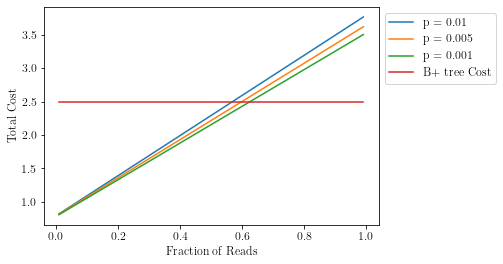

In [37]:
beta=0.7
p=0.005
Nb=10**6

ps=[0.01,0.005,0.001]
deltas=[0.6,0.7,0.8,0.9,1]
# for d in deltas:
for p in ps:
    cs=[]
    std_cost=[]
    for r in rs:
        cs.append(cost(beta,d, p, Nb, r))
        std_cost.append(math.log(Nb,B))
    plt.plot(rs,cs, label="p = "+str(p))
plt.plot(rs, std_cost, label="B+ tree Cost")
plt.xlabel("Fraction of Reads")
plt.ylabel("Total Cost")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()